In [61]:
# import pytorch 
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt


print(torch.cuda.is_available())
print(torch.__version__)
print(torchvision.__version__)

True
2.6.0+cu126
0.21.0+cu126


In [62]:
# getting a dataset
train_data = datasets.FashionMNIST(root="data", #where to download data  ,
                                   train=True,#training version of dataset
                                   download=True, # do we want to download 
                                   transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
                                   target_transform=None 
                            
                                   )


test_data = datasets.FashionMNIST(root="data", #where to download data  ,
                                   train=False,#training version of dataset
                                   download=True, # do we want to download 
                                   transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
                                   target_transform=None 
                            
                                   )





In [63]:
len(train_data), len(test_data)

(60000, 10000)

In [64]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [65]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [66]:
class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [67]:
print(f"image shape {image.shape}, image label : {label}")

image shape torch.Size([1, 28, 28]), image label : 9


image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

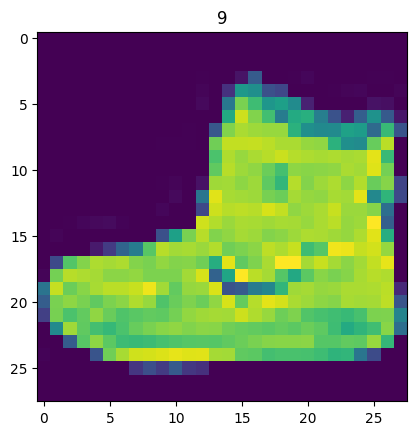

In [68]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label=label)

Text(0.5, 1.0, 'Ankle boot')

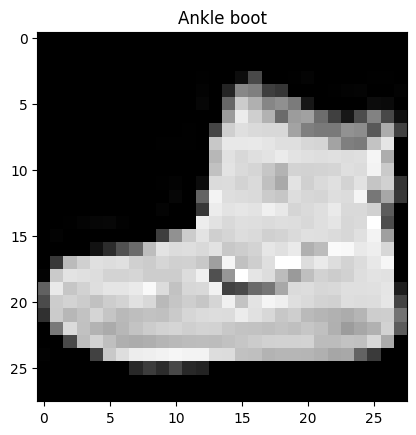

In [69]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label])

10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572
29315
48295
48567
24706


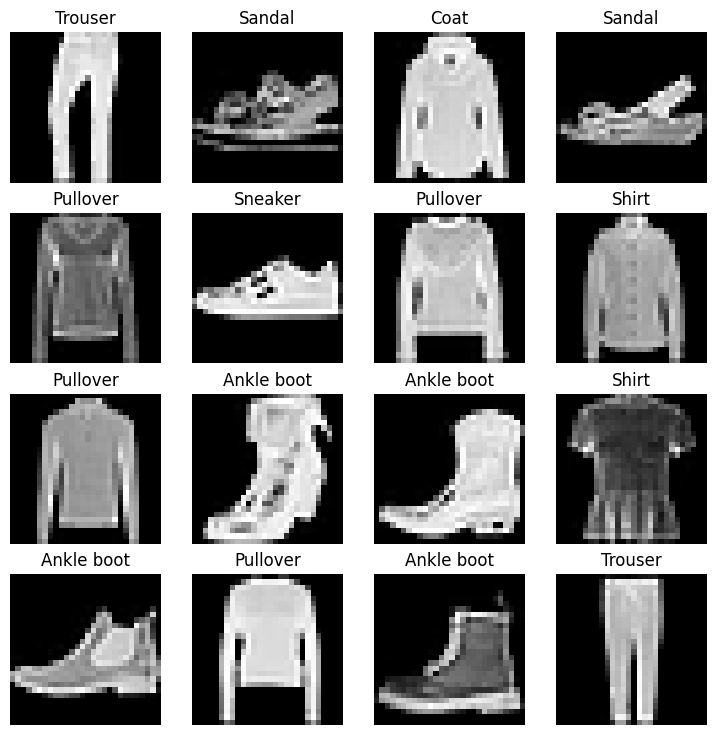

In [70]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    print(random_index)
    img,label = train_data[random_index]
    fig.add_subplot(rows,cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)

In [71]:
# prepare data loader turns our python dataset to a iterable
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)



In [72]:
print(f"Dataloaders:  {train_dataloader, test_dataloader}")
print(f"len of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ")
print(f"len of the test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ")

Dataloaders:  (<torch.utils.data.dataloader.DataLoader object at 0x000002772F491350>, <torch.utils.data.dataloader.DataLoader object at 0x000002774E4D2690>)
len of the train dataloader: 1875 batches of 32 
len of the test dataloader: 313 batches of 32 


In [73]:
# what's inside a training dataloader

train_featurs_batch, train_labels_batch = next(iter(train_dataloader))
train_featurs_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size torch.Size([1, 28, 28])
Label: 4, label size torch.Size([])


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.0000, 0.0000, 0.0000,
           0.0000, 0.5333, 0.5176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0039, 0.6196, 0.4784, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0941, 0.5529,
           0.8392, 0.8039, 0.9137, 0.8784, 0.8275, 0.7529, 0.7804, 0.9373,
           0.8980, 0.8902, 0.8510, 0.9490, 

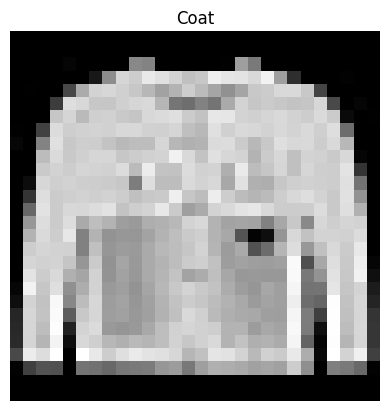

In [74]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_featurs_batch), size=[1]).item()
img, label = train_featurs_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"image size {img.shape}")
print(f"Label: {label}, label size {label.shape}")
img, label

In [75]:
# model 0 build a base line model 
flatten_model = nn.Flatten()

# get a single sample 
X = train_featurs_batch[0]


# flatten the sample 
output = flatten_model(X)

# print out what happened
print(f"shape before flattening: {X.shape}")
print(f"shape after flattening: {output.shape}")



shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [76]:
output.squeeze()

output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0039, 0.0118, 0.0000, 0.0000, 0.0000, 0.2039, 0.1529,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.5529,
         0.3412, 0.0000, 0.0

In [77]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, output_shape:int, hidden_layer:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_layer),
            nn.Linear(in_features=hidden_layer, out_features=output_shape)
        )
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [78]:
torch.manual_seed(42)

# setup model with input params

model_0 = FashionMNISTModelV0(input_shape=784,  # 28 * 28
                              output_shape=len(train_data.classes),
                              hidden_layer=10).to("cpu")


model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [79]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [80]:
# setup loss and optimizer and torch metrics
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")


helper_functions.py already exists, skipping download


In [81]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)




In [82]:
# create a function to time our experiments 
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float, 
                     device:torch.device = None):
    
    "Prints difference between start and end time"
    
    
    total_time = end - start
    
    print(f"train time on {device}: {total_time:.3f} seconds")
    
    return total_time

In [83]:
start_time = timer()

end_time = timer()


print_train_time(start=start_time, end=end_time, device="cuda")


train time on cuda: 0.000 seconds


5.13000413775444e-05

In [84]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(
                test_pred, y
            )  # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(
        f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n"
    )

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device),
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:12,  6.46s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:14<00:07,  7.62s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:24<00:00,  8.17s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

train time on cpu: 24.509 seconds


In [85]:
# make predictions and get model 0 results

torch.manual_seed(42)


def eval_model(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn:nn.Module,  acc_fn):
    """ RETURNS A DICT CONTAINING THE RESULT OF THE MODEL PREDICTING ON DATA_LOADER """
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # forward pass
            y_pred = model(X)
            
            # accumulate
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        # scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        
    return {"model_name" : model_0.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc }
    
    
    

In [86]:
# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, acc_fn=accuracy_fn)


model_0_results

100%|██████████| 313/313 [00:01<00:00, 292.47it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [87]:
device = "cuda" if torch.cuda.is_available() else "cpu"



In [88]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_features:int, output_features:int, hidden_neurons:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons, out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons, out_features=output_features)
        )
        
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)
    

In [89]:
model_1 = FashionMNISTModelV1(input_features=784, output_features=len(train_data.classes), hidden_neurons=32).to(device=device)

model_1


FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)